# Van-der-Pol oscillator

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The Van der Pol oscillator is:
$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab\ddot{x}+\mu(x^2-1)\dot{x}+x=0
$$
Writing it as a system:
$$
\mtab\dot{x}=y
$$
$$
\mtab\dot{y}=-x-\mu(x^2-1)y
$$
We will just plot some solutions for now:

In [2]:
from scipy.integrate import odeint
def solve_de(sysfunc, y0, t0, tmin, tmax, npoints=200, **kwargs):
    tleft = linspace(t0, tmin, npoints)
    yleft = odeint(sysfunc, y0, tleft, **kwargs)
    tright = linspace(t0, tmax, npoints)
    yright = odeint(sysfunc, y0, tright, **kwargs)
    return concatenate((yleft[-1:0:-1], yright))

In [3]:
mu = 0.5
def sysfunc(xvec,t):
    x, y = xvec
    return array([ y,
                   -x - mu * ( x ** 2 - 1) * y])

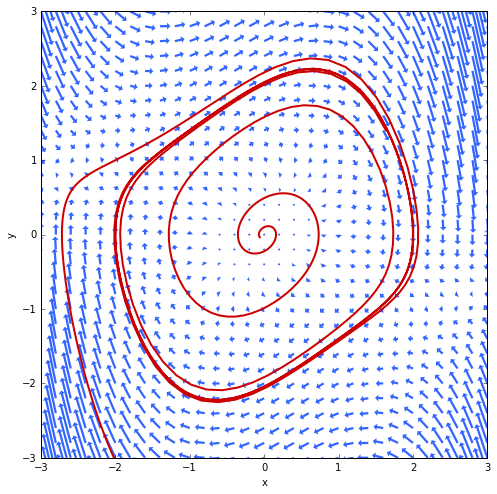

In [4]:
# Options for quiver() function.
# See documentation of quiver() for meaning of parameters.
quiver_opts = dict(units='x',
                   scale=20,
                   width=0.03,
                   headwidth=3,
                   headlength=1.5,
                   headaxislength=1.5,
                   color='#3366FF',
                   alpha=1.0)
# These define the range of
# the plot, and the interval
# at which arrows are plotted.
xyrange = 3                                    
r = arange(-xyrange-1, xyrange+1, 0.2)
X, Y = meshgrid( r, r )
# Initial conditions
# Specify time range for each solution
ics = [[[-2,1], -2, 20],
       [[0,0.1], -2, 20],
       ]
# Number of points in solution
npoints = 200
# Define figure and axes
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)
axis([-xyrange, xyrange, -xyrange, xyrange])
# Plot direction field
U, V = sysfunc([X, Y], 0)
t0 = 0
Q = quiver( X, Y, U, V, **quiver_opts)
for y0, tmin, tmax in ics:
    y = solve_de(sysfunc, y0, t0, tmin, tmax, npoints=npoints)
    plot(*zip(*y), lw=2, color='#CC0000', aa=True)
    pass
xlabel('x')
ylabel('y')